# Описание проекта

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.
Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.

### Описание данных
***Признаки***
- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

***Целевой признак***
- `Exited` — факт ухода клиента


## Постановка задачи
### [Шаг 1. Знакомство с данными и изучение общей информации](#section1)
### [Шаг 2. Подготовка данных](#section2)
Подготовка данных к работе: удаление пропусков и лишних столбцов, создание категориальных признаков.

### [Шаг 3. Исследование разных моделей машинного обучения](#section3)
Поиск лучших моделей машинного обучения без учета дисбаланса классов.

### [Шаг 4. Борьба с дисбалансом](#section4)
Исследование выбранной модели с учетом устранения дисбаланса классов разными методами.

### [Шаг 5. Дополнительное задание](#section5)


### [Шаг 6. Общий вывод](#section6)


# Решение задачи
## Шаг 1. Знакомство с данными и изучение общей информации. <a class="anchor" id="section1"></a>

Импортируем необходимые библиотеки для дальнейшей работы.

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings

warnings.filterwarnings('ignore')
# Здесь же зафиксируем псевдослучайность для алгоритмов обучения
random_val = 42

Чтение файла с данными и вывод случайных пяти строчек таблицы для ознакомления.

In [5]:
# users_data = pd.read_csv('/datasets/Churn.csv')
users_data = pd.read_csv('Churn.csv')
users_data.sample(n=10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3049,3050,15576219,Cameron,615,France,Male,32,NaN,0.00,2,1,1,6225.63,0
2684,2685,15631927,Thomas,574,Spain,Female,28,7.0,0.00,2,0,0,185660.30,0
7544,7545,15791326,Nnamdi,566,France,Male,34,3.0,0.00,1,0,0,188135.69,0
7575,7576,15687634,Glover,561,Germany,Male,49,5.0,94754.00,1,1,1,26691.31,0
6350,6351,15799600,Coles,640,Germany,Male,48,1.0,111599.32,1,0,1,135995.58,0
7320,7321,15778142,Shih,850,Germany,Female,31,1.0,130089.56,2,1,1,4466.21,0
4881,4882,15614778,Robertson,579,France,Male,31,6.0,0.00,2,1,0,26149.25,0
1034,1035,15689176,Fabro,663,France,Male,46,3.0,0.00,2,0,1,176276.10,0
8664,8665,15666332,Donaldson,690,Spain,Female,48,2.0,0.00,2,1,1,3149.10,0
4103,4104,15693337,Perry,683,Spain,Male,41,0.0,148863.17,1,1,1,163911.32,0


Получение общей информации о датафрейме.

In [6]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
print('Размер таблицы {} значений, пропусков в таблице {}, доля пропусков {:2%}'.format(len(users_data),
                                                                                        max(users_data.isna().sum()),
                                                                                        max(users_data.isna().sum()) / len(
                                                                                            users_data)))

Размер таблицы 10000 значений, пропусков в таблице 909, доля пропусков 9.090000%


В столбце `Tenure` есть 909 пропусков. Посмотрим чем заполнен столбец.

In [8]:
users_data['Tenure'].value_counts().sort_index()

0.0     382
1.0     952
2.0     950
3.0     928
4.0     885
5.0     927
6.0     881
7.0     925
8.0     933
9.0     882
10.0    446
Name: Tenure, dtype: int64

Несмотря на тип данных `float`, данные в столбце заполнены целыми значениями. Распределение выглядит плюс-минус равномерно, но для значений `0` и `10` есть просадка. Заполнить пропуски, не потеряв в качестве данных, не представляется возможным (кроме как взять полностью заполненный сет с каггла))), а значит при подготовке данных 9% можно удалить, не особо потеряв в качестве.

In [9]:
users_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


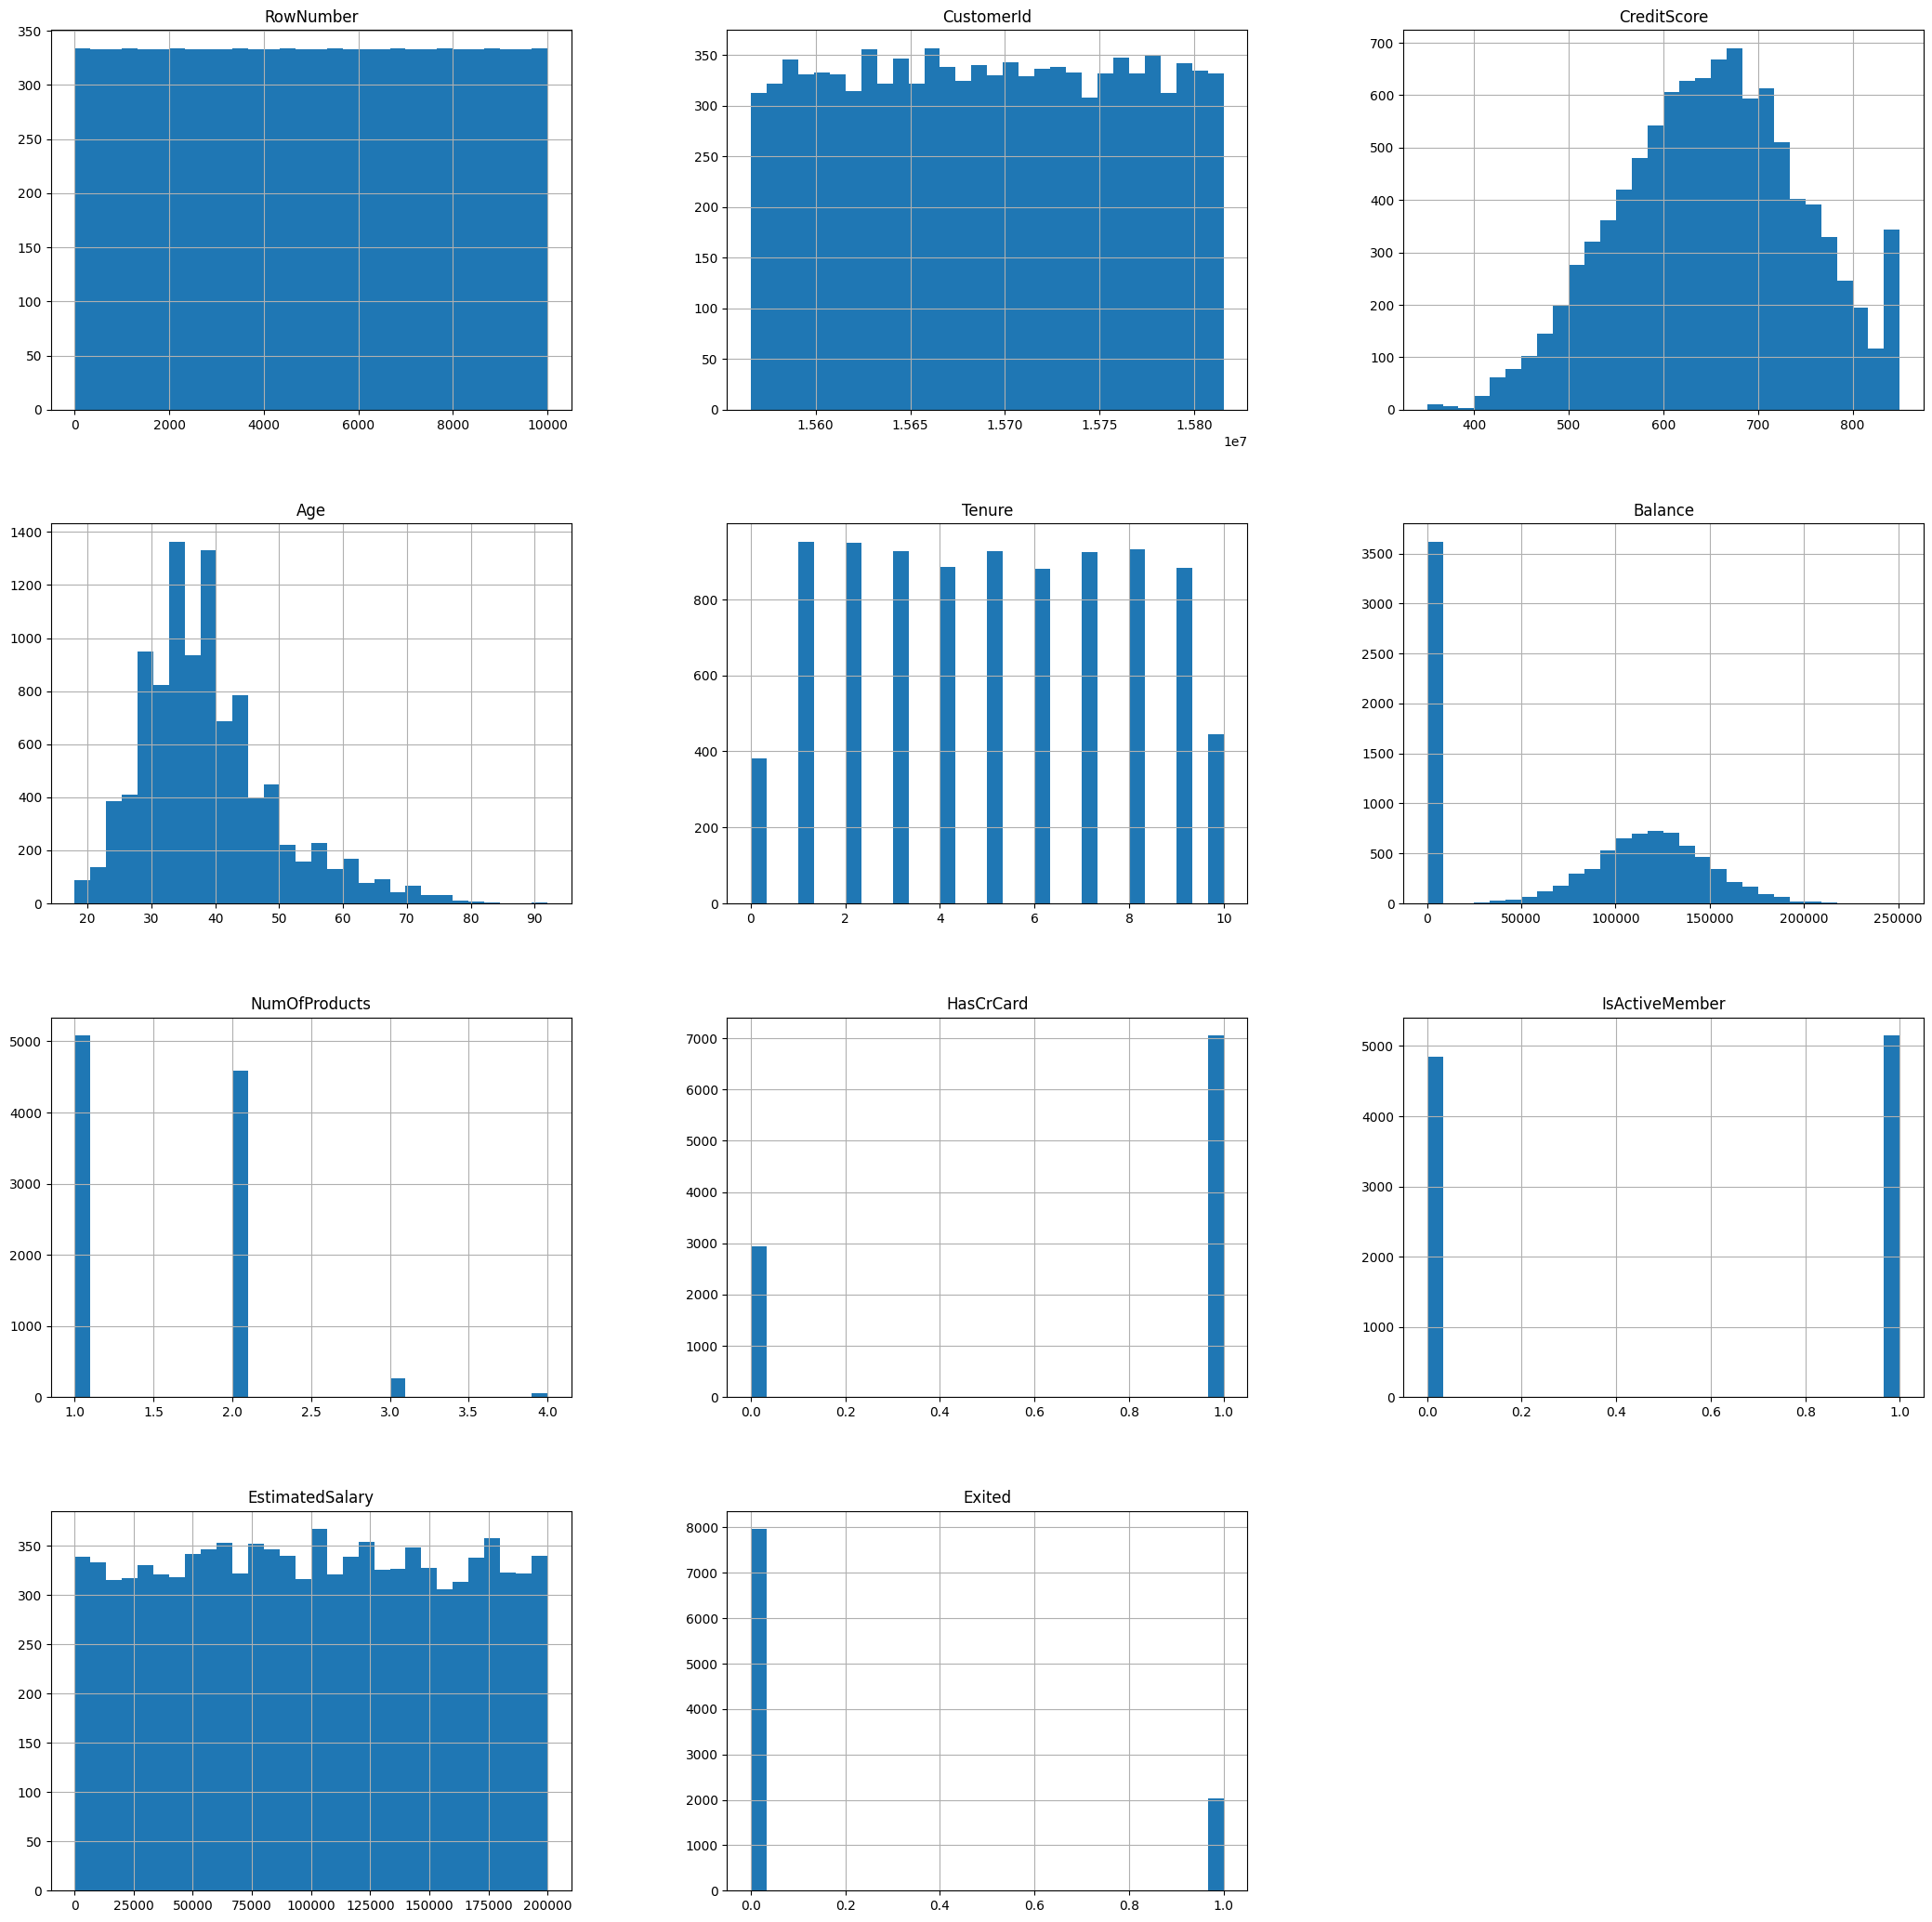

In [10]:
users_data.hist(figsize=(26, 26), bins=30)
plt.show()

Исходя из логики рассмотренных данных все выбросы выглядят естественно.

In [11]:
print('Доля объектов положительного класса:', sum(users_data['Exited'] / len(users_data)))
print('Доля объектов отрицательного класса:', 1 - sum(users_data['Exited'] / len(users_data)))

Доля объектов положительного класса: 0.20369999999999389
Доля объектов отрицательного класса: 0.7963000000000061


**Наблюдения:**
1. Перед нами стоит задача классификации. За целевой признак берем столбец `Exited`. Остальные признаки помогут нам предсказывать решение по столбцу `Exited`.
2. Перед началом работы необходимо подготовить данные к работе, а именно:
* удалить строки с пропущенными значениями;
* удалить столбцы `RowNumber`, `CustomerId` и `Surname`, как не несущие важной в предсказании информации;
* заменить на категориальные признаки столбец `Geography`;
* заменить на категориальные признаки столбец`Gender`.
3. Необходимо так же разделить данные на обучающую, валидационную и тестовую выборки.
4. После разделения данных в тестовой выборке необходимо будем устранить дисбаланс классов.

## Шаг 2. Подготовка данных <a class="anchor" id="section2"></a>
Перед созданием выборок необходимо убрать данные, создающие шум.

In [12]:
# Изменение названий столбцов
users_data.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography', 'gender', 'age', 'tenure',
                      'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited']
# Удаление излишних столбцов
users_data.drop(['row_number', 'customer_id', 'surname'], axis=1, inplace=True)
# Удаление строк с пропусками
users_data.dropna(axis=0, inplace=True)
# Приведем значения внутри колонок с типом данных object к нижнему регистру
users_data['gender'] = users_data['gender'].str.lower()
users_data['geography'] = users_data['geography'].str.lower()
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      9091 non-null   int64  
 1   geography         9091 non-null   object 
 2   gender            9091 non-null   object 
 3   age               9091 non-null   int64  
 4   tenure            9091 non-null   float64
 5   balance           9091 non-null   float64
 6   num_of_products   9091 non-null   int64  
 7   has_cr_card       9091 non-null   int64  
 8   is_active_member  9091 non-null   int64  
 9   estimated_salary  9091 non-null   float64
 10  exited            9091 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 852.3+ KB


In [13]:
# Проверим наличие дубликатов
users_data.duplicated().sum()

0

Проверим какими данными заполнены строки `geography` и `gender`.

In [14]:
print('Уникальные значения стран {} и гендеров {}'.format(users_data['geography'].unique(),
                                                          users_data['gender'].unique()))

Уникальные значения стран ['france' 'spain' 'germany'] и гендеров ['female' 'male']


Проведем прямое кодирование полей для всего датасета.

In [15]:
users_data_dummies = pd.get_dummies(users_data, drop_first=True)
users_data_dummies.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_germany,geography_spain,gender_male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Разделим исходные данные на обучающую, валидационную и тестовую выборки.
Разобьем выборку по принципу 60/20/20.

In [16]:
features_train_data, features_test_data, target_train_data, target_test_data = train_test_split(
    users_data_dummies.drop(['exited'], axis=1), users_data_dummies['exited'], test_size=0.2, random_state=random_val)

features_train_data, features_valid_data, target_train_data, target_valid_data = train_test_split(
    features_train_data, target_train_data, test_size=0.25, random_state=random_val)

In [17]:
print('Размер обучающей выборки', features_train_data.shape[0])
print('Размер валидационной выборки', features_valid_data.shape[0])
print('Размер тестовой выборки', features_test_data.shape[0])

Размер обучающей выборки 5454
Размер валидационной выборки 1818
Размер тестовой выборки 1819


**Итог:**
Проведена предобработка данных,
* удалены строки с пропусками в строках `tenure``;
* удалены зашумляющие столбцы `row_number`, `customer_id` и `surname`;
* проведено кодирование столбцов `geography` и `gender` методом *dummies*.

Данные были разбиты по принципу 60/20/20:
- Обучение пройдет на данных `features_train_data` и `target_train_data`;
- Валидация модели на данных `features_valid_data` и `target_valid_data`;
- Лучшая модель по валидации будет применена на данных `features_test_data` и `target_test_data`.

## Шаг 3. Исследование разных моделей машинного обучения <a class="anchor" id="section3"></a>
Исследуем баланс классов, обучим модели без учёта дисбаланса.
Для начала посмотрим на модель линейной регрессии.

In [18]:
nb_lr = LogisticRegression()
nb_lr_parameter_grid = {'penalty': ['l1', 'l2'],
                        'C': np.arange(0, 2, 0.1),
                        'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                        'random_state': [random_val]}
#
nb_lr_gridsearch = GridSearchCV(nb_lr,                              # модель
                                param_grid=nb_lr_parameter_grid,    # гиперпараметры
                                scoring='accuracy',                 # метрика проверки
                                )
nb_lr_gridsearch.fit(features_train_data, target_train_data)
#
print('Параметры модели {}'.format(nb_lr_gridsearch.best_params_))
nb_lr_predictions = nb_lr_gridsearch.predict(features_valid_data)
nb_lr_accuracy = accuracy_score(target_valid_data, nb_lr_predictions)
nb_lr_f1_score = f1_score(target_valid_data, nb_lr_predictions)
print('Точность: {:.3f}, F1: {:.3f}'.format(nb_lr_accuracy, nb_lr_f1_score))

Параметры модели {'C': 0.2, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}
Точность: 0.814, F1: 0.344


Проверим модель решающего дерева.

In [19]:
nb_dtc = DecisionTreeClassifier()
nb_dtc_parameter_grid = {'criterion': ['gini', 'entropy'],
                         'max_depth': np.arange(1, 20),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [random_val]}
nb_dtc_gridsearch = GridSearchCV(nb_dtc,                            # модель
                                 param_grid=nb_dtc_parameter_grid,  # гиперпараметры
                                 scoring='accuracy',                # метрика проверки
                                 )
nb_dtc_gridsearch.fit(features_train_data, target_train_data)
#
print('Параметры модели {}'.format(nb_dtc_gridsearch.best_params_))
nb_dtc_predictions = nb_dtc_gridsearch.predict(features_valid_data)
nb_dtc_accuracy = accuracy_score(target_valid_data, nb_dtc_predictions)
nb_dtc_f1_score = f1_score(target_valid_data, nb_dtc_predictions)
print('Точность: {:.3f}, F1: {:.3f}'.format(nb_dtc_accuracy, nb_dtc_f1_score))

Параметры модели {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'random_state': 42}
Точность: 0.853, F1: 0.538


Проверим модель случайного леса.

In [20]:
nb_rfc = RandomForestClassifier()
nb_rfc_parameter_grid = {'criterion'    : ['gini', 'entropy'],
                         'max_depth'    : np.arange(1, 101, 10),
                         'n_estimators' : np.arange(1, 21),
                         'random_state' : [random_val]}
nb_rfc_gridsearch = GridSearchCV(nb_rfc,                            # модель
                                 param_grid=nb_rfc_parameter_grid,  # гиперпараметры
                                 scoring='accuracy',                # метрика проверки
                                 )
nb_rfc_gridsearch.fit(features_train_data, target_train_data)
#
print('Параметры модели {}'.format(nb_rfc_gridsearch.best_params_))
nb_rfc_predictions = nb_rfc_gridsearch.predict(features_valid_data)
nb_rfc_accuracy = accuracy_score(target_valid_data, nb_rfc_predictions)
nb_rfc_f1_score = f1_score(target_valid_data, nb_rfc_predictions)
print('Точность: {:.3f}, F1: {:.3f}'.format(nb_rfc_accuracy, nb_rfc_f1_score))

Параметры модели {'criterion': 'entropy', 'max_depth': 31, 'n_estimators': 14, 'random_state': 42}
Точность: 0.856, F1: 0.564


**Итог:**
В ходе исследования были получены следующие данные:

Точность модели логистической регрессии равна 0.814.
Точность модели решающего дерева при глубине 7 равна 0.853.
Точность модели случайного леса при количестве деревьев 14 и глубине 31 равна 0.856.

Так как выборка небольшая, то лучший результат показывает случайный лес с гиперпараметрами:
- количество деревьев = 14,
- глубина леса = 31,
- критерий: entropy.

## Шаг 4.  Борьба с дисбалансом <a class="anchor" id="section4"></a>
Еще раз посмотрим как обстоят дела с балансом разных классов.

In [21]:
print('Доля объектов положительного класса: {:.2%}'.format(sum((target_train_data == 1) / len(target_train_data))))
print('Доля объектов отрицательного класса: {:.2%}'.format(sum((target_train_data == 0) / len(target_train_data))))

Доля объектов положительного класса: 20.33%
Доля объектов отрицательного класса: 79.67%


Можно заметить существенный перевес объектов отрицательного класса, практически в 4 раза, что несомненно хорошо для банка, но неудобно для обучения моделей машинного обучения.

Есть три основных способа борьбы с дисбалансом:
1. Upsampling;
2. Downsampling;
3. Добавить в модель параметр class_weight (не создавая новых набооров данных, данный метод настраивает вес классов внутри самой модели).

Реализуем все 3 способа поочередно.

In [22]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=random_val)
    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(features_train_data, target_train_data, 4)

In [23]:
print('Доля объектов положительного класса: {:.2%}'.format(sum((target_upsampled == 1) / len(target_upsampled))))
print('Доля объектов отрицательного класса: {:.2%}'.format(sum((target_upsampled == 0) / len(target_upsampled))))

Доля объектов положительного класса: 50.52%
Доля объектов отрицательного класса: 49.48%


In [24]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=random_val)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=random_val)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=random_val)

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(features_train_data, target_train_data, 0.25)

In [25]:
print('Доля объектов положительного класса: {:.2%}'.format(sum((target_downsampled == 1) / len(target_downsampled))))
print('Доля объектов отрицательного класса: {:.2%}'.format(sum((target_downsampled == 0) / len(target_downsampled))))

Доля объектов положительного класса: 50.52%
Доля объектов отрицательного класса: 49.48%


Обучим модели на сбалансированных данных. Лучше всего на необработанных данных показала себя модель случайного леса, с ней и продолжим работать.

In [26]:
# Данные сбалансированные с помощью метода Upsampling
ub_rfc = RandomForestClassifier()
ub_rfc_parameter_grid = {'criterion'    : ['gini', 'entropy'],
                         'max_depth'    : np.arange(1, 101, 10),
                         'n_estimators' : np.arange(1, 21),
                         'random_state' : [random_val]}
ub_rfc_gridsearch = GridSearchCV(ub_rfc,                            # модель
                                 param_grid=ub_rfc_parameter_grid,  # гиперпараметры
                                 scoring='accuracy',                # метрика проверки
                                 )
ub_rfc_gridsearch.fit(features_upsampled, target_upsampled)
#
print('Параметры модели {}'.format(ub_rfc_gridsearch.best_params_))
ub_rfc_predictions = ub_rfc_gridsearch.predict(features_valid_data)
ub_rfc_accuracy = accuracy_score(target_valid_data, ub_rfc_predictions)
ub_rfc_f1_score = f1_score(target_valid_data, ub_rfc_predictions)
print('Точность: {:.3f}, F1: {:.3f}'.format(ub_rfc_accuracy, ub_rfc_f1_score))

Параметры модели {'criterion': 'entropy', 'max_depth': 31, 'n_estimators': 18, 'random_state': 42}
Точность: 0.849, F1: 0.612


In [27]:
# Данные сбалансированные с помощью метода Downsampling
db_rfc = RandomForestClassifier()
db_rfc_parameter_grid = {'criterion'    : ['gini', 'entropy'],
                         'max_depth'    : np.arange(1, 101, 10),
                         'n_estimators' : np.arange(1, 21),
                         'random_state' : [random_val]}
db_rfc_gridsearch = GridSearchCV(db_rfc,                            # модель
                                 param_grid=db_rfc_parameter_grid,  # гиперпараметры
                                 scoring='accuracy',                # метрика проверки
                                 )
db_rfc_gridsearch.fit(features_downsampled, target_downsampled)
#
print('Параметры модели {}'.format(db_rfc_gridsearch.best_params_))
db_rfc_predictions = db_rfc_gridsearch.predict(features_valid_data)
db_rfc_accuracy = accuracy_score(target_valid_data, db_rfc_predictions)
db_rfc_f1_score = f1_score(target_valid_data, db_rfc_predictions)
print('Точность: {:.3f}, F1: {:.3f}'.format(db_rfc_accuracy, db_rfc_f1_score))

Параметры модели {'criterion': 'entropy', 'max_depth': 31, 'n_estimators': 15, 'random_state': 42}
Точность: 0.767, F1: 0.566


In [28]:
# Данные сбалансированные с помощью метода class_weight
cwb_rfc = RandomForestClassifier(class_weight='balanced')
cwb_rfc_parameter_grid = {'criterion'    : ['gini', 'entropy'],
                         'max_depth'    : np.arange(1, 101, 10),
                         'n_estimators' : np.arange(1, 21),
                         'random_state' : [random_val]
                          }
cwb_rfc_gridsearch = GridSearchCV(cwb_rfc,                          # модель
                                 param_grid=cwb_rfc_parameter_grid, # гиперпараметры
                                 scoring='accuracy',                # метрика проверки
                                 )
cwb_rfc_gridsearch.fit(features_train_data, target_train_data)
print('Параметры модели {}'.format(cwb_rfc_gridsearch.best_params_))
cwb_rfc_predictions = cwb_rfc_gridsearch.predict(features_valid_data)
cwb_rfc_accuracy = accuracy_score(target_valid_data, cwb_rfc_predictions)
cwb_rfc_f1_score = f1_score(target_valid_data, cwb_rfc_predictions)
print('Точность: {:.3f}, F1: {:.3f}'.format(cwb_rfc_accuracy, cwb_rfc_f1_score))

Параметры модели {'criterion': 'gini', 'max_depth': 21, 'n_estimators': 19, 'random_state': 42}
Точность: 0.845, F1: 0.549


**Итог:**
Лучшей моделью на валидационной выборке показала себя модель случайного леса с балансом классов методом upsampled и параметрами
- точность: 0.849,
- F1: 0.612.

## Шаг 5. Итоговая модель <a class="anchor" id="section5"></a>
Проверим модель на вменяемость, для этого проведем сравнение между константным предсказанием и лучшей обученной моделью - блалансированным случайным лесом.

In [29]:
ub_rfc_predictions_test = ub_rfc_gridsearch.predict(features_test_data)
print('Качество модели на тестовой выборке - точность(accuracy): {:.3f}, полнота(recall): {:.3f}, '
      'точность(precision): {:.3f}, F1-мера: {:.3f}, AUC-ROC: {:.3f}'
      .format(accuracy_score(target_valid_data, cwb_rfc_predictions),
              recall_score(target_test_data, ub_rfc_predictions_test),
              precision_score(target_test_data, ub_rfc_predictions_test),
              f1_score(target_test_data, ub_rfc_predictions_test),
              roc_auc_score(target_test_data, ub_rfc_predictions_test)
              )
      )

Качество модели на тестовой выборке - точность(accuracy): 0.845, полнота(recall): 0.532, точность(precision): 0.682, F1-мера: 0.598, AUC-ROC: 0.734


In [30]:
dc_model = DummyClassifier(strategy='most_frequent', random_state=random_val)
dc_model.fit(features_train_data, target_train_data)

target_data_true = target_test_data
dc_predictions = dc_model.predict(features_test_data)
dc_accuracy = accuracy_score(target_test_data, dc_predictions)
dc_precision = precision_score(target_test_data, dc_predictions)
dc_recall = recall_score(target_test_data, dc_predictions)
dc_f_score = f1_score(target_test_data, dc_predictions)
print('Точность(accuracy) константного предсказания на тестовой выборке {}, точность(precision) {}, '
      'полнота(recall) {}, F1-мера {}'.format(dc_accuracy, dc_precision, dc_recall, dc_f_score))

Точность(accuracy) константного предсказания на тестовой выборке 0.794392523364486, точность(precision) 0.0, полнота(recall) 0.0, F1-мера 0.0


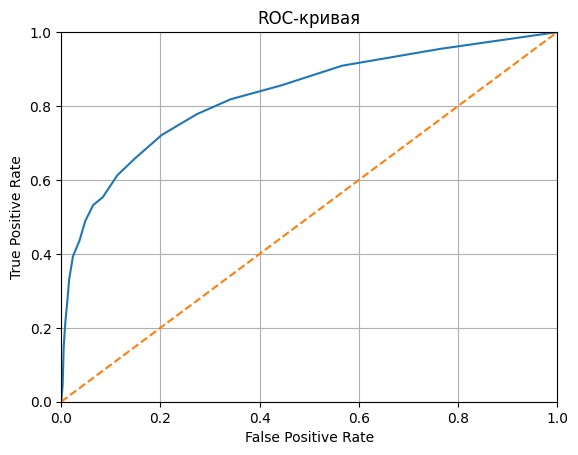

In [31]:
final_model_probabilities_one = ub_rfc_gridsearch.predict_proba(features_test_data)[:, 1]

fpr, tpr, thresholds = roc_curve(target_test_data, final_model_probabilities_one)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.grid(True)
plt.show()

Финальный вариант модели достиг заданной метрики (F1 > 0.59) и показывает адекватные результаты.

Для улучшения модели следует использовать данные, отражающие отношения клиента с банком в динамике.

## Шаг 6. Общий вывод <a class="anchor" id="section6"></a>

В ходе проделанной работы было выполнено:
1. В рамках подготовки данных:
- скорректированы наименования полей;
- проанализированы выбросы и дубликаты;
- обработаны пропуски;
- категориальные признаки переведены в дамми переменные.
2. Проведен выбор лучшей модели для дальнейшего прогнозирования. Проанализированы модели LogisticRegression, DecisionTreeClassifier, RandomForestClassifier. При сравнении базовых моделей, без дополнительных гиперпараметров, наилучший результат по F1 показала модель случайного леса. Далее будем использовать её для подбора оптимальных гиперпараметров. Наилучший показаталь модель случайного леса на тестовой модели F1 = 0.564 при гиперпараметрах:
- количество деревьев = 14;
- глубина леса = 31;
- критерий: entropy.
3. Для борьбы с дисбалансом использован метод upsampling, что позволило поднять показатель f1. Поэтому для дальнейшего прогноза были использованы данные features_upsampled, target_upsampled полученные с помощью upsampling.
4. Проведена проверка модели на адекватность, путём сравнения со случайной моделью.
- Доля правильных ответов accuracy в полученной модели 0.845 Доля правильных ответов accuracy в случайной модели 0.794.
- Проверка на адекватность показала, что доля правильных ответов accuracy в полученной модели выше чем аналогичный показатель случайной модели. Делаем вывод, что полученная нами модель является полезной.
- Построена модель с предельно большим значением F1-меры
- Дополнительно построена ROC - кривая, и измерена AUC-ROC = 0.734